# Dot Product of a data point and the coefficient vector as the Distance from datapoint to hyperplane

The title says it all. Let's prove it. In order to do so, we must discuss some more details about the dot product and vector projections

## The Dot Product
The [dot product](https://en.wikipedia.org/wiki/Dot_product) is a fundamental operation when working with data and an integral part of many machine learning algorithms. There are a few equivalent, but different ways to calculate the dot product of two vectors.

### Algebraic Definition

Algebraically, the dot product is defined as follows:
for two vectors $$\overrightarrow{x}=\left[\begin{matrix}
x_1\\
y_1\\
\end{matrix}
\right],\ 
\overrightarrow{y} = \left[\begin{matrix}
y_1\\
y_2\\
\end{matrix}
\right]
$$
The dot product is:
$$\overrightarrow{x} \cdot \overrightarrow{y} = x_1y_1+x_2y_2$$

Occasionally, you'll see this representation as well:
$$\overrightarrow{x} \cdot \overrightarrow{y} = \overrightarrow{x}^T\overrightarrow{y}$$

### Geometric Definition
Geometrically, the dot product of two vectors $\overrightarrow{x}$ and $\overrightarrow{y}$ is the product of their magnitudes, multiplied by the angle between them. Expressed mathematically,
$$\overrightarrow{x} \cdot \overrightarrow{y} = ||\overrightarrow{x}||\ ||\overrightarrow{y}|| \cos\theta$$
where $\theta$ is the angle between the vectors.

![Labeled Angles Graph](angles_graph.png)

Often, we may not be able to calculate the angle $\theta$ between the vectors directly, but we can use a trigonometric identity to calculate its cos if we know $\beta$ and $\alpha$, like above:
\begin{align*}
	\cos{\theta}=\cos(\beta-\alpha)&=(\cos\beta)(\cos\alpha) + (\sin\beta)(\sin\alpha)\\
	\cos\theta&=\left(\frac{u_1}{||\overrightarrow{u}||}\right)\left(\frac{v_1}{||\overrightarrow{v}||}\right) + 
	\left(\frac{u_2}{||\overrightarrow{u}||}\right)\left(\frac{v_2}{||\overrightarrow{v}||}\right)\\
	\cos\theta&= \frac{u_1v_1}{||\overrightarrow{u}||||\overrightarrow{v}||} + \frac{u_2v_2}{||\overrightarrow{u}||||\overrightarrow{v}||}\\
	\cos\theta&= \frac{u_1v_1+u_2v_2}{||\overrightarrow{u}||||\overrightarrow{v}||}\\
	(\cos\theta)(||\overrightarrow{u}||||\overrightarrow{v}||)&=u_1v_1+u_2v_2\\
	(\cos\theta)(||\overrightarrow{u}||||\overrightarrow{v}||)&= \overrightarrow{u}\cdot\overrightarrow{v}
\end{align*}

In the last two lines, we applied a bit of algebraic manipulation to verify the geometric definiton of the dot product.

## Vector Projections

Below are two examples of vector projections. I we're projecting $\overrightarrow{u}$ onto $\overrightarrow{v}$, we denote it as follows: $proj_{\overrightarrow{v}}\ \overrightarrow{u}$.

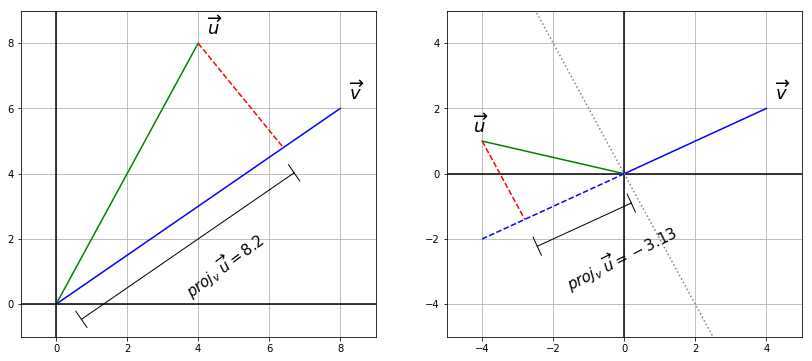

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# define figure and add subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

x1 = np.linspace(0,8,2)
x2 = np.linspace(0,4,2)
x3 = np.linspace(4, 6.4, 2)

######################
#  Ax1
######################
# plotting vectors
ax1.plot(x1, .75*x1, c='b')
ax1.plot(x2, 2*x2, c='g')


# annotating
ax1.text(4.25, 8.25, r'$\overrightarrow{u}$', fontsize=18)
ax1.text(8.25, 6.25, r'$\overrightarrow{v}$', fontsize=18)
ax1.annotate("",
            xy=(2/3, -.5), xycoords='data',
            xytext=(6.75, 4.0625), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),)
ax1.text(3.5, 1.75, r"$proj_{v}\ \overrightarrow{u}=8.2$", rotation=36.87,
            size=15)

    
ax1.set_xlim(0,10)
ax1.set_ylim(0,10)

# calculate projection of u onto v
u = np.array([4,8])
v = np.array([8,6])
proj_u_onto_v = ((np.dot(u,v))/np.linalg.norm(v) ** 2) * v

# plot projection
#plt.plot(x3, (proj_u_onto_v[1] / proj_u_onto_v[0]) * x3, 'r--' )
ax1.plot(x3, (-4/3 * x3 + (40/3)), 'r--' )

ax1.set_xlim(-1,9)
ax1.set_ylim(-1,9)
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

######################
#  Ax2
######################
ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

# plotting Vectors
ax2.plot(np.array([0,4]), np.array([0,2]), color='b')
ax2.plot(np.array([0,-4]), np.array([0,1]), color='g')
# dotted
ax2.plot(np.array([0,-4]), np.array([0,-2]), 'b--')
x4 = np.linspace(-4,-2.8,2)
ax2.plot(x4, -2*x4-7, 'r--')

# annotating
ax2.text(4.25, 2.25, r'$\overrightarrow{v}$', fontsize=18)
ax2.text(-4.25, 1.25, r'$\overrightarrow{u}$', fontsize=18)
ax2.annotate("",
            xy=(.25, -.875), xycoords='data',
            xytext=(-2.5, -2.25), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3"),)
ax2.text(-1.75, -2., r"$proj_{v}\ \overrightarrow{u}=-3.13$", rotation=26.57,size=15)

#perpendicular hyperplane
x5 = np.linspace(-4,4,2)
ax2.plot(x5, -2 * x5, color='grey', linestyle=':')

A projection gives us another vector. We're not necessarily interested in the vector itself, but rather its magnitude. The hard-core mathy definition of $|proj_{\overrightarrow{v}}\ \overrightarrow{u}|$ reads as follows:

$$|proj_{\overrightarrow{v}}\ \overrightarrow{u}| = \left| \left(\frac{\overrightarrow{u}\cdot\overrightarrow{v}}{|\overrightarrow{v}|^2}\right) \overrightarrow{v} \right|$$

With a bit of algebraic manipulation, we see that

\begin{align*}
	|proj_{\overrightarrow{v}}\ \overrightarrow{u}| &= \left| \left(\frac{\overrightarrow{u}\cdot\overrightarrow{v}}{|\overrightarrow{v}|^2}\right) \overrightarrow{v} \right|\\
	&= \left(\frac{\overrightarrow{u}\cdot\overrightarrow{v}}{|\overrightarrow{v}|^2}\right) \cdot |\overrightarrow{v}|\\
	&= \frac{\overrightarrow{u}\cdot\overrightarrow{v}}{|\overrightarrow{v}|}\\
	&= \overrightarrow{u}\cdot \frac{\overrightarrow{v}}{|\overrightarrow{v}|}
\end{align*}

Here, you many notice that the quantity $\frac{\overrightarrow{v}}{|\overrightarrow{v}|}$ is just the direction of $\overrightarrow{v}$. Thus, we can summarize this with the statement that the length of the projection of $\overrightarrow{u}$ onto $\overrightarrow{v}$ is equivalent to the dot product of $\overrightarrow{u}$ and the direction of $\overrightarrow{v}$.

## So, does the dot product equal the distance from the hyperplane?

In short, no. They would only be equivalent in the event that $\overrightarrow{v}$ is a [unit vector](https://en.wikipedia.org/wiki/Unit_vector). In some texts, I've seen this constraint imposed on the maximal margin classifier optimization problem (in particular, on page 343 of [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)).

It is, however, often explained that you can think of the dot product of a datapoint and the coefficients vector as the distance from the datapoint to the separating hyperplane, in the context of a Support Vector Machine. We do indeed use the dot product in this fashion. The reason for that is $|\overrightarrow{v}|$ is simply a scalar quantity. Dividing $\overrightarrow{v}$ by a scalar only changes the scale of $\overrightarrow{u} \cdot \overrightarrow{v}$. Thus, though $\overrightarrow{u} \cdot \overrightarrow{v}$ does not always represent the physical distance from $\overrightarrow{u}$ to the hyperplane, it can be thought of as a 'score' representing how far the datapoint is from the hyperplane (relatively speaking).

Lastly, it turns out that the process of maximizing the margin of our separating hyperplane is equivalent to minimizing the coefficient vector [Alexandre Kowalcyzk explains it here](https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/). The implication of this is that the optimal coefficient vector ($\overrightarrow{v}$ in our example) is often close to being a unit vector.